In [6]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./HMEQ.csv", encoding = 'euc=kr')

In [8]:
# 그래픽 한글폰트 적용
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [9]:
def fun_data_layout(v_data): 
    print("Data 구조 : ", v_data.shape)
    print()
    
    print("변수 : ", v_data.columns)
    print()

In [10]:
fun_data_layout(df_raw)

Data 구조 :  (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')



In [11]:
df_raw.BAD.value_counts(normalize = True)

0    0.907951
1    0.092049
Name: BAD, dtype: float64

In [12]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [13]:
df_raw.JOB.unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Self', 'Sales', nan],
      dtype=object)

In [14]:
df_raw.REASON.unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [15]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [16]:
# df_train_raw.BAD.value_counts(normalize = True), df_test.BAD.value_counts(normalize = True)

In [17]:
df_raw_dummy=pd.get_dummies(df_raw)

In [18]:
df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (2248, 18)
train dzta Y size : (2248,)
test dzta X size : (1500, 18)
test dzta Y size : (1500,)


# 그라디언트 부스팅

In [17]:
gb_uncust = GradientBoostingClassifier(random_state = 1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Train 예측 결과  :\n", gb_uncust.score(df_train_x, df_train_y), "\n")
print("Accuracy: {0:.3f}\n".format(gb_uncust.score(df_test_x, df_test_y)))

Train 예측 결과  :
 0.9697508896797153 

Accuracy: 0.943



In [4]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
train_accuracy = []
test_accuracy = []

# learning_rate
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["lr"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,lr,TrainAccuracy,TestAccuracy
0,0.1,0.970,0.943
1,0.2,0.990,0.943
2,0.3,0.997,0.942
3,0.4,1.000,0.941
4,0.5,1.000,0.939
5,0.6,1.000,0.947
6,0.7,1.000,0.936
7,0.8,1.000,0.939
8,0.9,1.000,0.934


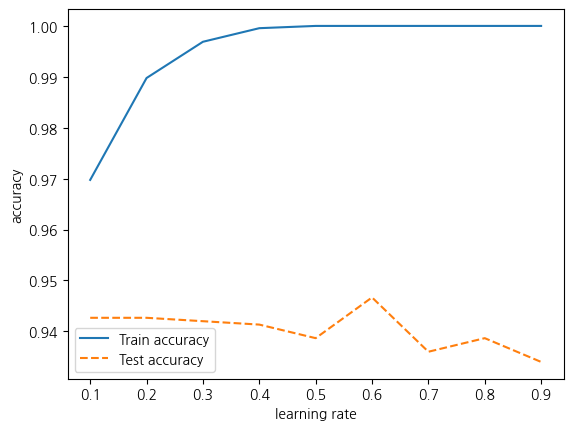

In [32]:
plt.plot(para_lr,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_lr,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

In [33]:
train_accuracy = []
test_accuracy = []

# n_estimators : 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.934,0.927
1,20,0.940,0.931
2,30,0.950,0.938
3,40,0.954,0.940
4,50,0.958,0.939
5,60,0.960,0.941
6,70,0.965,0.942
7,80,0.966,0.943
8,90,0.968,0.943
9,100,0.970,0.943


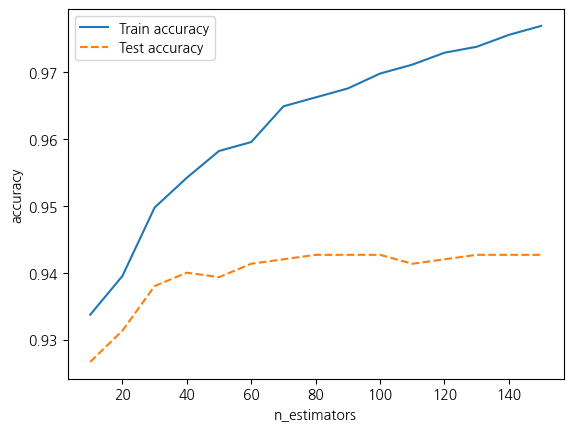

In [34]:
plt.plot(para_n_tree,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [35]:
train_accuracy = []
test_accuracy = []

# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators=100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["Trainaccuracy"] = train_accuracy
df_accuracy_depth["Testaccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,Trainaccuracy,Testaccuracy
0,1,0.936,0.933
1,2,0.952,0.938
2,3,0.970,0.943
3,4,0.984,0.938
4,5,0.992,0.945
5,6,1.000,0.943
6,7,1.000,0.943
7,8,1.000,0.948
8,9,1.000,0.945
9,10,1.000,0.949


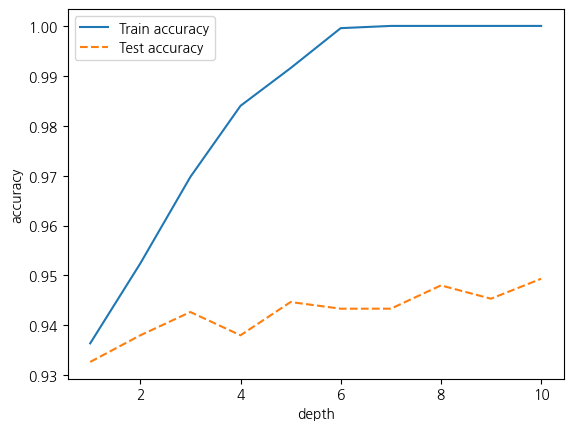

In [36]:
plt.plot(para_depth,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend()

In [37]:
train_accuracy = []
test_accuracy = []

# min_sample_split : 분할하기 위한 노드의 최소자료 수
para_split = [n_split * 2 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth = 6, n_estimators=100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,4,1.000,0.943
1,6,0.999,0.943
2,8,0.999,0.945
3,10,0.997,0.943
4,12,0.998,0.944
5,14,0.999,0.947
6,16,0.999,0.944
7,18,0.996,0.945
8,20,0.996,0.943


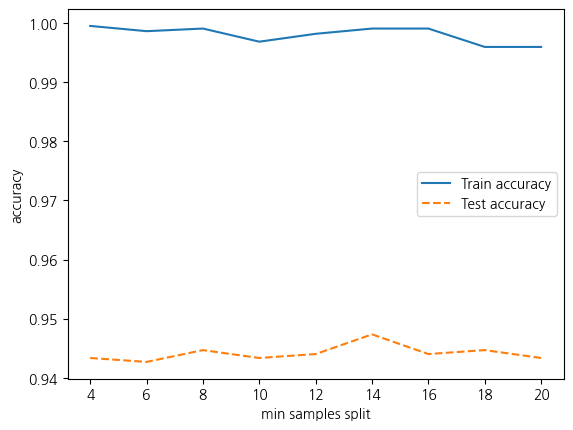

In [38]:
plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

In [39]:
train_accuracy = []
test_accuracy = []

# min_sample_leaf : 잎사귀 노드 최소 자료 수
para_leaf = [n_leaf * 5 for n_leaf in range(2,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 6, n_estimators=100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["Trainaccuracy"] = train_accuracy
df_accuracy_leaf["Testaccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesleaf,Trainaccuracy,Testaccuracy
0,10,0.996,0.945
1,15,0.993,0.947
2,20,0.990,0.943
3,25,0.988,0.943
4,30,0.987,0.941
5,35,0.984,0.943
6,40,0.985,0.939
7,45,0.982,0.940
8,50,0.980,0.940


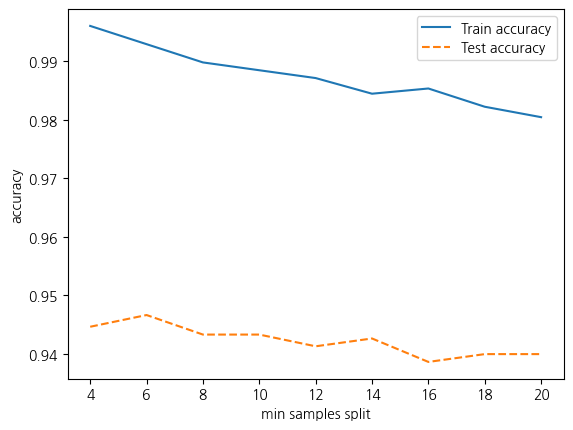

In [40]:
plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

In [41]:
gb_final = GradientBoostingClassifier(min_samples_leaf=15,max_depth=6, n_estimators=100,learning_rate=0.1, random_state=1234 )

gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Accurcy on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))


print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accurcy on training set: 0.993
Accuracy on test set: 0.947
Confusion matrix: 
[[1360    0]
 [  80   60]]
              precision    recall  f1-score   support

           0      0.944     1.000     0.971      1360
           1      1.000     0.429     0.600       140

    accuracy                          0.947      1500
   macro avg      0.972     0.714     0.786      1500
weighted avg      0.950     0.947     0.937      1500



In [42]:
# 변수명 저장
v_feature_name = df_train_x.columns


# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
9,DEBTINC,0.323
6,CLAGE,0.141
5,DELINQ,0.111
2,VALUE,0.085
8,CLNO,0.067
0,LOAN,0.062
3,YOJ,0.053
7,NINQ,0.050
1,MORTDUE,0.043
4,DEROG,0.041


Text(0, 0.5, '변수')

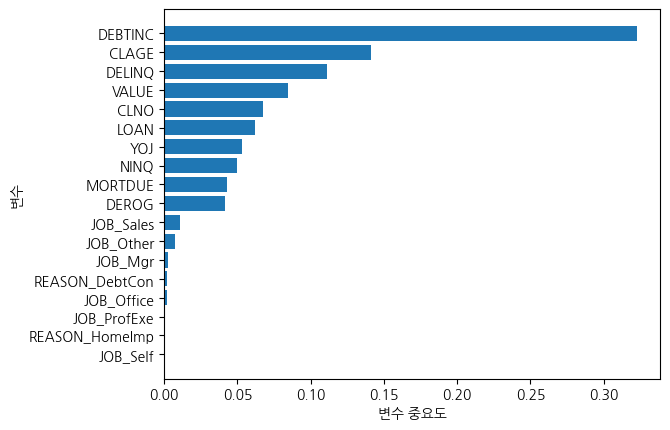

In [43]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {'learning_rate' : para_lr, 'max_depth' : para_depth, 'min_samples_leaf': para_leaf}

gb = GradientBoostingClassifier()

random_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3, scoring="r2", random_state=42)
random_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_gb.best_estimator_))
print("\nbest parameter: \n{}".format(random_gb.best_params_))
print("\nbest score: \n{}".format(random_gb.best_score_.round(3)))


best estimator model: 
GradientBoostingClassifier(learning_rate=0.7000000000000001, max_depth=7,
                           min_samples_leaf=20)

best parameter: 
{'min_samples_leaf': 20, 'max_depth': 7, 'learning_rate': 0.7000000000000001}

best score: 
0.383


# 확장 XG Boost  p.129 ~ p.134

In [50]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [64]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도:{:.4f}'.format(accuracy))
    print('정밀도:{:.4f}'.format(precision))   
    print('재현율:{:.4f}'.format(recall))
    print('F1:{:.4f}'.format(F1))
    print('AUC:{:.4f}'.format(AUC))

In [65]:
xg_boost_uncust = XGBClassifier(random_state=1234)
xg_boost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [67]:
xg_boost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train\n')
xgb_pred_train = xg_boost_uncust.predict(df_train_x)
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test\n')
xgb_pred_test = xg_boost_uncust.predict(df_test_x)
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train

오차행렬:
 [[2043    0]
 [   0  205]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

 모델 생성 및 평가 : Test

오차행렬:
 [[1359    1]
 [  78   62]] 

정확도:0.9473
정밀도:0.9841
재현율:0.4429
F1:0.6108
AUC:0.7211


In [68]:
# 사용자 모델 생성
xgboost_user = XGBClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 5, random_state = 1234)

#모델 적합
xgboost_user.fit(df_train_x, df_train_y)

xgb_pred_train = xgboost_user.predict(df_train_x)

print('\b 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n', classification_report(df_train_y, xgb_pred_train))

xgb_pred_test = xgboost_user.predict(df_test_x)\

print('\b 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n', classification_report(df_test_y, xgb_pred_test))

 사용자 모델 평가 : Train 

오차행렬:
 [[2043    0]
 [  33  172]] 

정확도:0.9853
정밀도:1.0000
재현율:0.8390
F1:0.9125
AUC:0.9195

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2043
           1       1.00      0.84      0.91       205

    accuracy                           0.99      2248
   macro avg       0.99      0.92      0.95      2248
weighted avg       0.99      0.99      0.98      2248

 사용자 모델 평가 : Test 

오차행렬:
 [[1358    2]
 [  82   58]] 

정확도:0.9440
정밀도:0.9667
재현율:0.4143
F1:0.5800
AUC:0.7064

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1360
           1       0.97      0.41      0.58       140

    accuracy                           0.94      1500
   macro avg       0.95      0.71      0.78      1500
weighted avg       0.95      0.94      0.93      1500



In [69]:
eval_df = [(df_test_x, df_test_y)]
xgb_stop = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds=150, eval_metric='logloss', eval_set= eval_df, verbose=True)

print('최적횟수 : ', xgb_stop.best_iteration)
print('최적성능(0-LogLoss)', xgb_stop.best_score)

[0]	validation_0-logloss:0.62154
[1]	validation_0-logloss:0.56296
[2]	validation_0-logloss:0.51406
[3]	validation_0-logloss:0.47343
[4]	validation_0-logloss:0.43837
[5]	validation_0-logloss:0.40812
[6]	validation_0-logloss:0.38242
[7]	validation_0-logloss:0.35904
[8]	validation_0-logloss:0.33947
[9]	validation_0-logloss:0.32221
[10]	validation_0-logloss:0.30628
[11]	validation_0-logloss:0.29260
[12]	validation_0-logloss:0.28093
[13]	validation_0-logloss:0.27082
[14]	validation_0-logloss:0.26194
[15]	validation_0-logloss:0.25415
[16]	validation_0-logloss:0.24747
[17]	validation_0-logloss:0.24097
[18]	validation_0-logloss:0.23537
[19]	validation_0-logloss:0.23066
[20]	validation_0-logloss:0.22645
[21]	validation_0-logloss:0.22298
[22]	validation_0-logloss:0.21984
[23]	validation_0-logloss:0.21691
[24]	validation_0-logloss:0.21345
[25]	validation_0-logloss:0.21135
[26]	validation_0-logloss:0.20926
[27]	validation_0-logloss:0.20711
[28]	validation_0-logloss:0.20570
[29]	validation_0-loglos

In [70]:
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n', classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1359    1]
 [  82   58]] 

정확도:0.9447
정밀도:0.9831
재현율:0.4143
F1:0.5829
AUC:0.7068

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1360
           1       0.98      0.41      0.58       140

    accuracy                           0.94      1500
   macro avg       0.96      0.71      0.78      1500
weighted avg       0.95      0.94      0.93      1500



{'LOAN': 462.0, 'MORTDUE': 389.0, 'VALUE': 479.0, 'YOJ': 362.0, 'DEROG': 115.0, 'DELINQ': 175.0, 'CLAGE': 441.0, 'NINQ': 167.0, 'CLNO': 434.0, 'DEBTINC': 559.0, 'REASON_DebtCon': 31.0, 'JOB_Mgr': 15.0, 'JOB_Office': 34.0, 'JOB_Other': 69.0, 'JOB_ProfExe': 33.0, 'JOB_Sales': 45.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

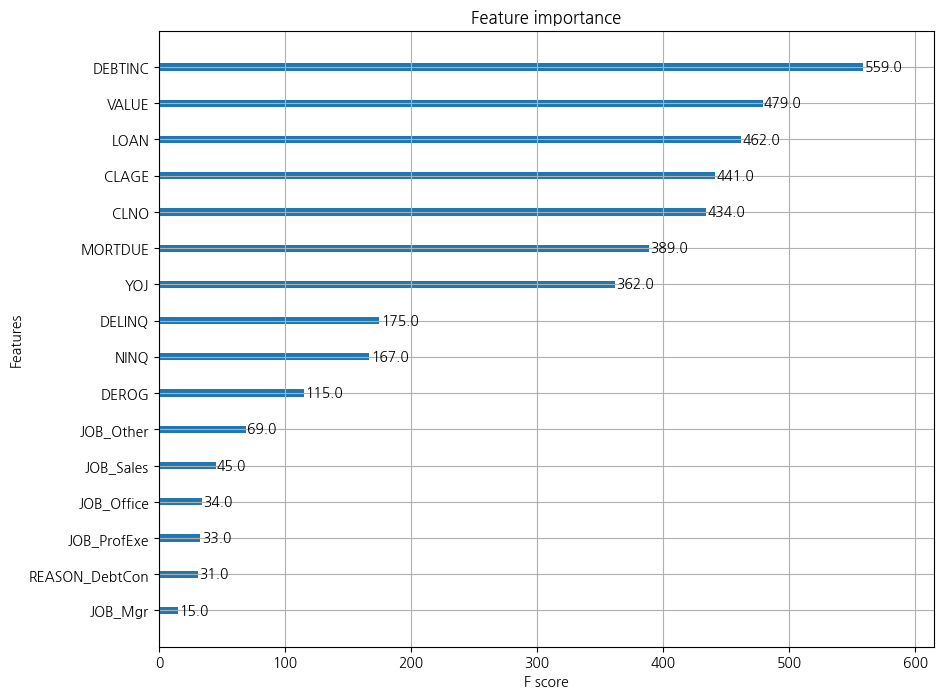

In [72]:
from xgboost import plot_importance
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_stop, ax=ax)

# LightGBM

In [21]:
!pip install lightgbm

In [26]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도:{:.4f}'.format(accuracy))
    print('정밀도:{:.4f}'.format(precision))   
    print('재현율:{:.4f}'.format(recall))
    print('F1:{:.4f}'.format(F1))
    print('AUC:{:.4f}'.format(AUC))

In [27]:
from lightgbm import LGBMClassifier

from lightgbm import plot_importance

In [28]:
lgbm_uncust = LGBMClassifier(random_state = 1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [29]:
lgbm_user = LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state = 1234)

lgbm_user.fit(df_train_x, df_train_y)

lgbm_pred_train = lgbm_user.predict(df_train_x)


print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2043    0]
 [   6  199]] 

정확도:0.9973
정밀도:1.0000
재현율:0.9707
F1:0.9851
AUC:0.9854

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2043
           1       1.00      0.97      0.99       205

    accuracy                           1.00      2248
   macro avg       1.00      0.99      0.99      2248
weighted avg       1.00      1.00      1.00      2248


 사용자 모델 평가 : Test 

오차행렬:
 [[1360    0]
 [  83   57]] 

정확도:0.9447
정밀도:1.0000
재현율:0.4071
F1:0.5787
AUC:0.7036

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1360
           1       1.00      0.41      0.58       140

    accuracy                           0.94      1500
   macro avg       0.97      0.70      0.77      1500
weighted avg       0.95      0.94      0.93      1500



In [30]:
eval_df = [(df_test_x, df_test_y)]
lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state = 1234)
lgbm_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, eval_metric = "logloss", eval_set = eval_df, verbose = True)

print("최적 횟수: ", lgbm_stop.best_iteration_)
print("최적 성능(0-LogLoss): ", lgbm_stop.best_score_)

[1]	valid_0's binary_logloss: 0.284886
[2]	valid_0's binary_logloss: 0.269273
[3]	valid_0's binary_logloss: 0.259978
[4]	valid_0's binary_logloss: 0.252781
[5]	valid_0's binary_logloss: 0.24588
[6]	valid_0's binary_logloss: 0.240022
[7]	valid_0's binary_logloss: 0.235853
[8]	valid_0's binary_logloss: 0.232176
[9]	valid_0's binary_logloss: 0.229128
[10]	valid_0's binary_logloss: 0.225667
[11]	valid_0's binary_logloss: 0.222852
[12]	valid_0's binary_logloss: 0.220823
[13]	valid_0's binary_logloss: 0.218382
[14]	valid_0's binary_logloss: 0.216272
[15]	valid_0's binary_logloss: 0.214701
[16]	valid_0's binary_logloss: 0.212755
[17]	valid_0's binary_logloss: 0.211286
[18]	valid_0's binary_logloss: 0.210276
[19]	valid_0's binary_logloss: 0.208617
[20]	valid_0's binary_logloss: 0.206998
[21]	valid_0's binary_logloss: 0.206283
[22]	valid_0's binary_logloss: 0.205394
[23]	valid_0's binary_logloss: 0.204359
[24]	valid_0's binary_logloss: 0.203505
[25]	valid_0's binary_logloss: 0.202895
[26]	valid

In [31]:
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1360    0]
 [  84   56]] 

정확도:0.9440
정밀도:1.0000
재현율:0.4000
F1:0.5714
AUC:0.7000

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1360
           1       1.00      0.40      0.57       140

    accuracy                           0.94      1500
   macro avg       0.97      0.70      0.77      1500
weighted avg       0.95      0.94      0.93      1500



['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[149 123 140 113  40  80 179  58 140 195   9   2   5   8  21   6  17   0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

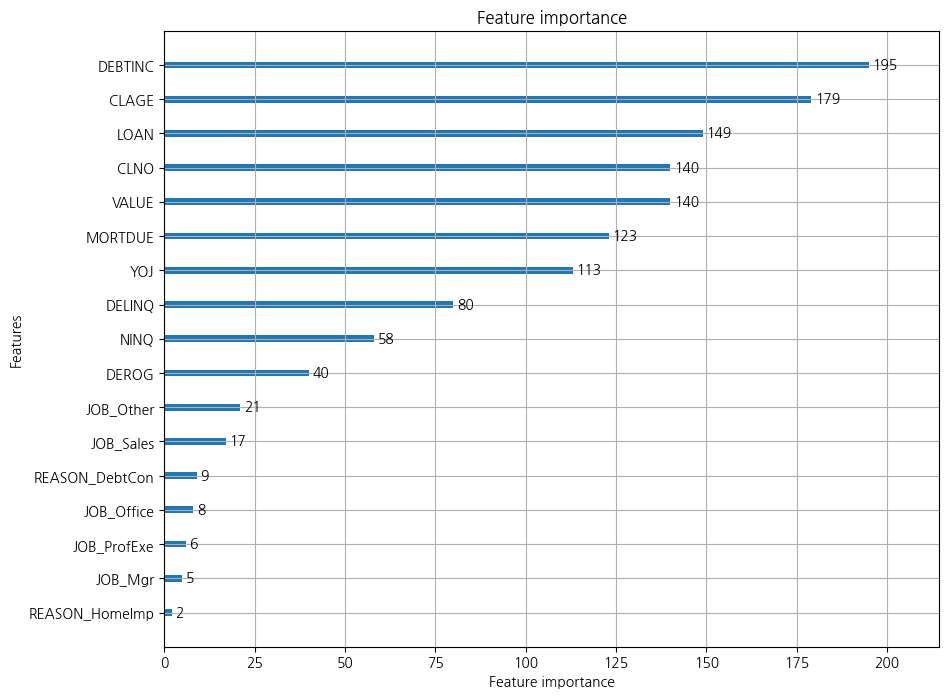

In [32]:
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)
fig, ax = plt.subplots(figsize = (10, 8))
plot_importance(lgbm_stop, ax = ax)

# Cat Boost

In [33]:
# 141쪽
# 패키지 불러오기
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

In [34]:
# 142쪽
# 기본 모델 및 parameter 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

# 예측 및 모델 평가 train
print('\n 모델 생성 및 평가 : Train \n')
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

# 예측 및 모델 평가: test
print('\n 모델 생성 및 평가 : Test \n')
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.01456
0:	learn: 0.6770944	total: 6.38ms	remaining: 6.37s
1:	learn: 0.6608422	total: 9.74ms	remaining: 4.86s
2:	learn: 0.6437408	total: 13.5ms	remaining: 4.49s
3:	learn: 0.6285385	total: 16.6ms	remaining: 4.12s
4:	learn: 0.6148530	total: 18.9ms	remaining: 3.76s
5:	learn: 0.6015083	total: 21.2ms	remaining: 3.52s
6:	learn: 0.5874753	total: 23.8ms	remaining: 3.37s
7:	learn: 0.5759738	total: 26.2ms	remaining: 3.24s
8:	learn: 0.5626545	total: 28.2ms	remaining: 3.11s
9:	learn: 0.5516744	total: 30.3ms	remaining: 3s
10:	learn: 0.5401818	total: 32.2ms	remaining: 2.9s
11:	learn: 0.5283753	total: 36.2ms	remaining: 2.98s
12:	learn: 0.5175032	total: 38.2ms	remaining: 2.9s
13:	learn: 0.5073745	total: 40ms	remaining: 2.82s
14:	learn: 0.4975241	total: 44.7ms	remaining: 2.93s
15:	learn: 0.4873424	total: 46.7ms	remaining: 2.87s
16:	learn: 0.4785504	total: 48.8ms	remaining: 2.82s
17:	learn: 0.4691567	total: 50.8ms	remaining: 2.77s
18:	learn: 0.4604619	total: 52.5ms	remaining: 2.71s


183:	learn: 0.1721180	total: 389ms	remaining: 1.72s
184:	learn: 0.1715127	total: 391ms	remaining: 1.72s
185:	learn: 0.1711622	total: 394ms	remaining: 1.72s
186:	learn: 0.1708256	total: 396ms	remaining: 1.72s
187:	learn: 0.1702973	total: 398ms	remaining: 1.72s
188:	learn: 0.1698984	total: 400ms	remaining: 1.72s
189:	learn: 0.1696030	total: 402ms	remaining: 1.71s
190:	learn: 0.1692338	total: 404ms	remaining: 1.71s
191:	learn: 0.1689187	total: 406ms	remaining: 1.71s
192:	learn: 0.1687432	total: 408ms	remaining: 1.7s
193:	learn: 0.1685295	total: 411ms	remaining: 1.71s
194:	learn: 0.1680475	total: 412ms	remaining: 1.7s
195:	learn: 0.1677118	total: 414ms	remaining: 1.7s
196:	learn: 0.1674067	total: 416ms	remaining: 1.7s
197:	learn: 0.1671664	total: 418ms	remaining: 1.69s
198:	learn: 0.1667617	total: 420ms	remaining: 1.69s
199:	learn: 0.1664787	total: 422ms	remaining: 1.69s
200:	learn: 0.1661838	total: 424ms	remaining: 1.68s
201:	learn: 0.1658952	total: 426ms	remaining: 1.68s
202:	learn: 0.16

376:	learn: 0.1256692	total: 778ms	remaining: 1.29s
377:	learn: 0.1256027	total: 780ms	remaining: 1.28s
378:	learn: 0.1254979	total: 785ms	remaining: 1.29s
379:	learn: 0.1253470	total: 787ms	remaining: 1.28s
380:	learn: 0.1252165	total: 789ms	remaining: 1.28s
381:	learn: 0.1251541	total: 791ms	remaining: 1.28s
382:	learn: 0.1248921	total: 793ms	remaining: 1.28s
383:	learn: 0.1246935	total: 795ms	remaining: 1.27s
384:	learn: 0.1243840	total: 797ms	remaining: 1.27s
385:	learn: 0.1241805	total: 799ms	remaining: 1.27s
386:	learn: 0.1239222	total: 801ms	remaining: 1.27s
387:	learn: 0.1237206	total: 802ms	remaining: 1.26s
388:	learn: 0.1235349	total: 804ms	remaining: 1.26s
389:	learn: 0.1234062	total: 806ms	remaining: 1.26s
390:	learn: 0.1231297	total: 808ms	remaining: 1.26s
391:	learn: 0.1228553	total: 810ms	remaining: 1.26s
392:	learn: 0.1227715	total: 813ms	remaining: 1.25s
393:	learn: 0.1226594	total: 815ms	remaining: 1.25s
394:	learn: 0.1224114	total: 817ms	remaining: 1.25s
395:	learn: 

557:	learn: 0.0969770	total: 1.17s	remaining: 923ms
558:	learn: 0.0968469	total: 1.17s	remaining: 921ms
559:	learn: 0.0966461	total: 1.17s	remaining: 919ms
560:	learn: 0.0965020	total: 1.17s	remaining: 917ms
561:	learn: 0.0963508	total: 1.17s	remaining: 914ms
562:	learn: 0.0960954	total: 1.17s	remaining: 912ms
563:	learn: 0.0960184	total: 1.18s	remaining: 910ms
564:	learn: 0.0958883	total: 1.18s	remaining: 908ms
565:	learn: 0.0956966	total: 1.18s	remaining: 906ms
566:	learn: 0.0956052	total: 1.18s	remaining: 904ms
567:	learn: 0.0955058	total: 1.19s	remaining: 901ms
568:	learn: 0.0953993	total: 1.19s	remaining: 899ms
569:	learn: 0.0953189	total: 1.19s	remaining: 897ms
570:	learn: 0.0951973	total: 1.19s	remaining: 895ms
571:	learn: 0.0949871	total: 1.19s	remaining: 892ms
572:	learn: 0.0948628	total: 1.19s	remaining: 890ms
573:	learn: 0.0947970	total: 1.2s	remaining: 888ms
574:	learn: 0.0946557	total: 1.2s	remaining: 886ms
575:	learn: 0.0945175	total: 1.2s	remaining: 884ms
576:	learn: 0.0

744:	learn: 0.0747957	total: 1.55s	remaining: 531ms
745:	learn: 0.0746872	total: 1.55s	remaining: 529ms
746:	learn: 0.0746609	total: 1.56s	remaining: 527ms
747:	learn: 0.0745228	total: 1.56s	remaining: 525ms
748:	learn: 0.0744531	total: 1.56s	remaining: 523ms
749:	learn: 0.0743521	total: 1.56s	remaining: 521ms
750:	learn: 0.0742547	total: 1.56s	remaining: 519ms
751:	learn: 0.0742028	total: 1.57s	remaining: 517ms
752:	learn: 0.0741354	total: 1.57s	remaining: 514ms
753:	learn: 0.0740474	total: 1.57s	remaining: 512ms
754:	learn: 0.0739545	total: 1.57s	remaining: 510ms
755:	learn: 0.0739004	total: 1.57s	remaining: 508ms
756:	learn: 0.0738346	total: 1.58s	remaining: 506ms
757:	learn: 0.0737518	total: 1.58s	remaining: 504ms
758:	learn: 0.0736877	total: 1.58s	remaining: 502ms
759:	learn: 0.0735569	total: 1.58s	remaining: 500ms
760:	learn: 0.0734500	total: 1.58s	remaining: 498ms
761:	learn: 0.0733876	total: 1.59s	remaining: 495ms
762:	learn: 0.0733077	total: 1.59s	remaining: 493ms
763:	learn: 

927:	learn: 0.0581806	total: 1.94s	remaining: 151ms
928:	learn: 0.0580892	total: 1.94s	remaining: 149ms
929:	learn: 0.0579756	total: 1.95s	remaining: 146ms
930:	learn: 0.0578939	total: 1.95s	remaining: 144ms
931:	learn: 0.0578332	total: 1.95s	remaining: 142ms
932:	learn: 0.0577035	total: 1.95s	remaining: 140ms
933:	learn: 0.0575846	total: 1.96s	remaining: 138ms
934:	learn: 0.0575156	total: 1.96s	remaining: 136ms
935:	learn: 0.0574074	total: 1.96s	remaining: 134ms
936:	learn: 0.0573060	total: 1.96s	remaining: 132ms
937:	learn: 0.0571916	total: 1.96s	remaining: 130ms
938:	learn: 0.0571321	total: 1.97s	remaining: 128ms
939:	learn: 0.0570464	total: 1.97s	remaining: 126ms
940:	learn: 0.0569216	total: 1.97s	remaining: 124ms
941:	learn: 0.0568183	total: 1.97s	remaining: 121ms
942:	learn: 0.0567356	total: 1.97s	remaining: 119ms
943:	learn: 0.0566036	total: 1.98s	remaining: 117ms
944:	learn: 0.0564803	total: 1.98s	remaining: 115ms
945:	learn: 0.0564270	total: 1.98s	remaining: 113ms
946:	learn: 

In [42]:
# 143쪽
# 사용자 모델 생성
cbc_user = CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)

# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가: Train
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 모델 생성 및 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n', classification_report(df_train_y, cbc_pred_train))

# 예측 및 모델 평가: Test
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 모델 생성 및 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n', classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5902645	total: 6.06ms	remaining: 1.21s
1:	learn: 0.5081560	total: 10.5ms	remaining: 1.04s
2:	learn: 0.4375504	total: 14.3ms	remaining: 937ms
3:	learn: 0.3876487	total: 18ms	remaining: 881ms
4:	learn: 0.3539099	total: 21.1ms	remaining: 823ms
5:	learn: 0.3270856	total: 23.8ms	remaining: 769ms
6:	learn: 0.3026010	total: 26.3ms	remaining: 724ms
7:	learn: 0.2852702	total: 28.8ms	remaining: 691ms
8:	learn: 0.2690020	total: 30.8ms	remaining: 655ms
9:	learn: 0.2548640	total: 32.9ms	remaining: 625ms
10:	learn: 0.2427702	total: 34.9ms	remaining: 600ms
11:	learn: 0.2327579	total: 37.2ms	remaining: 582ms
12:	learn: 0.2245270	total: 39.3ms	remaining: 565ms
13:	learn: 0.2187567	total: 41.4ms	remaining: 550ms
14:	learn: 0.2125548	total: 43.3ms	remaining: 534ms
15:	learn: 0.2073615	total: 45.8ms	remaining: 526ms
16:	learn: 0.2041382	total: 47.7ms	remaining: 514ms
17:	learn: 0.1997515	total: 49.5ms	remaining: 500ms
18:	learn: 0.1948107	total: 51.4ms	remaining: 489ms
19:	learn: 0.1910998	tot

199:	learn: 0.0332393	total: 392ms	remaining: 0us

 모델 생성 및 평가 : Train 

오차행렬:
 [[2043    0]
 [  15  190]] 

정확도:0.9933
정밀도:1.0000
재현율:0.9268
F1:0.9620
AUC:0.9634

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2043
           1       1.00      0.93      0.96       205

    accuracy                           0.99      2248
   macro avg       1.00      0.96      0.98      2248
weighted avg       0.99      0.99      0.99      2248


 모델 생성 및 평가 : Test 

오차행렬:
 [[1360    0]
 [  80   60]] 

정확도:0.9467
정밀도:1.0000
재현율:0.4286
F1:0.6000
AUC:0.7143

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1360
           1       1.00      0.43      0.60       140

    accuracy                           0.95      1500
   macro avg       0.97      0.71      0.79      1500
weighted avg       0.95      0.95      0.94      1500



In [46]:
# 144쪽
eval_df = [(df_test_x, df_test_y)]
cbc_stop = CatBoostClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=1234)
cbc_stop.fit(df_train_x, df_train_y, early_stopping_rounds=150, eval_set=eval_df, verbose=True)

print("최적 횟수:", cbc_stop.bst_iteration_)
print("최적 성능(0-LogLoss):", cbc_stop.best_score_)

0:	learn: 0.5902645	test: 0.5910749	best: 0.5910749 (0)	total: 5.6ms	remaining: 1.67s
1:	learn: 0.5081560	test: 0.5113195	best: 0.5113195 (1)	total: 10.5ms	remaining: 1.56s
2:	learn: 0.4375504	test: 0.4423026	best: 0.4423026 (2)	total: 14.4ms	remaining: 1.42s
3:	learn: 0.3876487	test: 0.3947237	best: 0.3947237 (3)	total: 17.8ms	remaining: 1.32s
4:	learn: 0.3539099	test: 0.3640658	best: 0.3640658 (4)	total: 21ms	remaining: 1.24s
5:	learn: 0.3270856	test: 0.3383548	best: 0.3383548 (5)	total: 24.2ms	remaining: 1.18s
6:	learn: 0.3026010	test: 0.3159926	best: 0.3159926 (6)	total: 26.5ms	remaining: 1.11s
7:	learn: 0.2852702	test: 0.3006835	best: 0.3006835 (7)	total: 28.9ms	remaining: 1.06s
8:	learn: 0.2690020	test: 0.2870829	best: 0.2870829 (8)	total: 31.3ms	remaining: 1.01s
9:	learn: 0.2548640	test: 0.2747391	best: 0.2747391 (9)	total: 33.7ms	remaining: 976ms
10:	learn: 0.2427702	test: 0.2656470	best: 0.2656470 (10)	total: 35.9ms	remaining: 943ms
11:	learn: 0.2327579	test: 0.2570865	best: 0

185:	learn: 0.0380653	test: 0.1851118	best: 0.1815889 (112)	total: 397ms	remaining: 243ms
186:	learn: 0.0377625	test: 0.1855868	best: 0.1815889 (112)	total: 400ms	remaining: 242ms
187:	learn: 0.0375132	test: 0.1860187	best: 0.1815889 (112)	total: 402ms	remaining: 240ms
188:	learn: 0.0370988	test: 0.1858416	best: 0.1815889 (112)	total: 405ms	remaining: 238ms
189:	learn: 0.0366275	test: 0.1855175	best: 0.1815889 (112)	total: 407ms	remaining: 235ms
190:	learn: 0.0364815	test: 0.1857424	best: 0.1815889 (112)	total: 409ms	remaining: 233ms
191:	learn: 0.0363228	test: 0.1859539	best: 0.1815889 (112)	total: 411ms	remaining: 231ms
192:	learn: 0.0360794	test: 0.1856443	best: 0.1815889 (112)	total: 413ms	remaining: 229ms
193:	learn: 0.0358023	test: 0.1857395	best: 0.1815889 (112)	total: 415ms	remaining: 227ms
194:	learn: 0.0353573	test: 0.1854013	best: 0.1815889 (112)	total: 417ms	remaining: 224ms
195:	learn: 0.0350635	test: 0.1853301	best: 0.1815889 (112)	total: 419ms	remaining: 222ms
196:	learn

AttributeError: 'CatBoostClassifier' object has no attribute 'bst_iteration_'

In [47]:
# 145쪽
cbc_pred_stop = cbc.stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test\n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n', classification_report(df_test_y, cbc_pred_stop))

NameError: name 'cbc' is not defined

In [48]:
# 146쪽
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)

df_cbc_importance = pd.DataFrame()
df_cbc_importance['Feature'] = cbc_stop.feature_names_
df_cbc_importance['Importance'] = cbc_stop.feature_importances_

df_cbc_importance.sort_values("Importance", ascending=False, inplace=True)
df_cbc_importance.round(3)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 9.83569601  7.36664865  7.9071476   6.70371865  2.97351679  8.68183457
 15.32097387  6.56355892 11.35615518 14.43235609  0.74728457  1.09669742
  0.52826079  0.45948003  2.8804136   2.05390734  1.02505501  0.06729492]


,Feature,Importance
6,CLAGE,15.321
9,DEBTINC,14.432
8,CLNO,11.356
0,LOAN,9.836
5,DELINQ,8.682
2,VALUE,7.907
1,MORTDUE,7.367
3,YOJ,6.704
7,NINQ,6.564
4,DEROG,2.974


Text(0, 0.5, '설명변수')

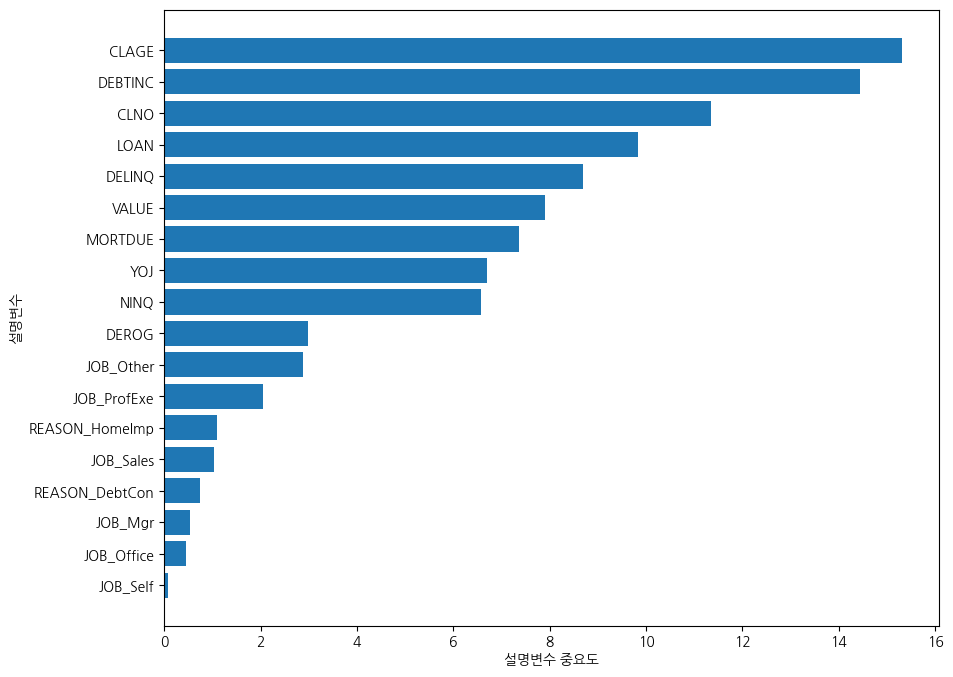

In [49]:
# 147쪽
fig, ax = plt.subplots(figsize=(10,8))
df_cbc_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_cbc_importance))
plt.barh(y=coordinates, width=df_cbc_importance["Importance"])
plt.yticks(coordinates, df_cbc_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")